In [1]:
import pandas as pd
import matplotlib.pyplot as plt

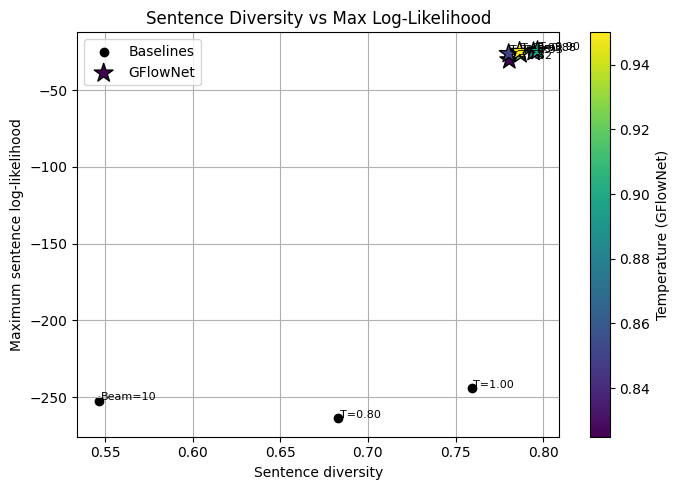

In [11]:
# Load the CSV file
df = pd.read_csv("gflownet_results.csv")

# Choose x and y metrics (easy to change these)
x_metric = "diversity"         # or "det"
y_metric = "max_likelihood"    # or "avg_likelihood"

# Plot setup
plt.figure(figsize=(7, 5))

# Plot non-gflownet methods as black dots
baseline = df[df["type"] != "gflownet"]
plt.scatter(baseline[x_metric], baseline[y_metric], color='black', label='Baselines')

# Add annotations for non-gflownet methods
for _, row in baseline.iterrows():
    if row["type"] == "ancestral":
        plt.text(row[x_metric] + 0.001, row[y_metric] + 0.5, f"T={row['temp']:.2f}", fontsize=8)
    elif row["type"] == "beam":
        plt.text(row[x_metric] + 0.001, row[y_metric] + 0.5, f"Beam={int(row['temp'])}", fontsize=8)

# Plot GFlowNet results as colored stars
gfn = df[df["type"] == "gflownet"]
sc = plt.scatter(gfn[x_metric], gfn[y_metric], c=gfn["temp"], cmap="viridis", s=200, marker="*", edgecolor='k', label='GFlowNet')

# Add temperature annotations
for _, row in gfn.iterrows():
    plt.text(row[x_metric] + 0.001, row[y_metric] + 0.5, f"T={row['temp']:.2f}", fontsize=8)

# Labels and legend
plt.xlabel("Sentence diversity" if x_metric == "diversity" else x_metric)
plt.ylabel("Maximum sentence log-likelihood" if y_metric == "max_likelihood" else y_metric)
# plt.axhline(y=-25, color='gray', linestyle='--')  # reference line like in the original plot
plt.title("Sentence Diversity vs Max Log-Likelihood")
plt.legend()
plt.colorbar(sc, label="Temperature (GFlowNet)")
plt.tight_layout()
plt.grid(True)
plt.show()
